In [50]:
import numpy as np
import re

In [52]:
data = """Artificial intelligence (AI) is transforming various industries by enabling machines to perform tasks that typically require human intelligence. One key area within AI is deep learning, which uses neural networks to model complex patterns in large datasets. These models can be trained in different ways, including supervised and unsupervised learning. Deep learning has led to significant advancements in technologies such as autonomous vehicles, voice-activated virtual assistants, medical diagnostics, and predictive analytics. By processing vast amounts of data, deep learning algorithms are able to recognize images, translate languages, and even predict future trends, driving innovation across numerous fields."""
data

'Artificial intelligence (AI) is transforming various industries by enabling machines to perform tasks that typically require human intelligence. One key area within AI is deep learning, which uses neural networks to model complex patterns in large datasets. These models can be trained in different ways, including supervised and unsupervised learning. Deep learning has led to significant advancements in technologies such as autonomous vehicles, voice-activated virtual assistants, medical diagnostics, and predictive analytics. By processing vast amounts of data, deep learning algorithms are able to recognize images, translate languages, and even predict future trends, driving innovation across numerous fields.'

In [54]:
sentences = data.split('.')
sentences

['Artificial intelligence (AI) is transforming various industries by enabling machines to perform tasks that typically require human intelligence',
 ' One key area within AI is deep learning, which uses neural networks to model complex patterns in large datasets',
 ' These models can be trained in different ways, including supervised and unsupervised learning',
 ' Deep learning has led to significant advancements in technologies such as autonomous vehicles, voice-activated virtual assistants, medical diagnostics, and predictive analytics',
 ' By processing vast amounts of data, deep learning algorithms are able to recognize images, translate languages, and even predict future trends, driving innovation across numerous fields',
 '']

In [56]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['artificial intelligence ai is transforming various industries by enabling machines to perform tasks that typically require human intelligence',
 'one key area within ai is deep learning which uses neural networks to model complex patterns in large datasets',
 'these models can be trained in different ways including supervised and unsupervised learning',
 'deep learning has led to significant advancements in technologies such as autonomous vehicles voice activated virtual assistants medical diagnostics and predictive analytics',
 'by processing vast amounts of data deep learning algorithms are able to recognize images translate languages and even predict future trends driving innovation across numerous fields']

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[10, 6, 7, 8, 11, 12, 13, 9, 14, 15, 1, 16, 17, 18, 19, 20, 21, 6], [22, 23, 24, 25, 7, 8, 3, 2, 26, 27, 28, 29, 1, 30, 31, 32, 4, 33, 34], [35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 5, 44, 2], [3, 2, 45, 46, 1, 47, 48, 4, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 5, 60, 61], [9, 62, 63, 64, 65, 66, 3, 2, 67, 68, 69, 1, 70, 71, 72, 73, 5, 74, 75, 76, 77, 78, 79, 80, 81, 82]]


In [62]:
index_to_word = {}
word_to_index = {}
word2id = tokenizer.word_index

for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
  
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value
        
vocab_size = len(word2id)
print('Vocabulary Size:', vocab_size)
print(index_to_word, "\n")
print(word_to_index)

Vocabulary Size: 82
{10: 'artificial', 6: 'intelligence', 7: 'ai', 8: 'is', 11: 'transforming', 12: 'various', 13: 'industries', 9: 'by', 14: 'enabling', 15: 'machines', 1: 'to', 16: 'perform', 17: 'tasks', 18: 'that', 19: 'typically', 20: 'require', 21: 'human', 22: 'one', 23: 'key', 24: 'area', 25: 'within', 3: 'deep', 2: 'learning', 26: 'which', 27: 'uses', 28: 'neural', 29: 'networks', 30: 'model', 31: 'complex', 32: 'patterns', 4: 'in', 33: 'large', 34: 'datasets', 35: 'these', 36: 'models', 37: 'can', 38: 'be', 39: 'trained', 40: 'different', 41: 'ways', 42: 'including', 43: 'supervised', 5: 'and', 44: 'unsupervised', 45: 'has', 46: 'led', 47: 'significant', 48: 'advancements', 49: 'technologies', 50: 'such', 51: 'as', 52: 'autonomous', 53: 'vehicles', 54: 'voice', 55: 'activated', 56: 'virtual', 57: 'assistants', 58: 'medical', 59: 'diagnostics', 60: 'predictive', 61: 'analytics', 62: 'processing', 63: 'vast', 64: 'amounts', 65: 'of', 66: 'data', 67: 'algorithms', 68: 'are', 69:

In [64]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[10, 6, 8, 11], [6, 7, 11, 12], [7, 8, 12, 13], [8, 11, 13, 9], [11, 12, 9, 14], [12, 13, 14, 15], [13, 9, 15, 1], [9, 14, 1, 16], [14, 15, 16, 17], [15, 1, 17, 18], [1, 16, 18, 19], [16, 17, 19, 20], [17, 18, 20, 21], [18, 19, 21, 6], [22, 23, 25, 7], [23, 24, 7, 8], [24, 25, 8, 3], [25, 7, 3, 2], [7, 8, 2, 26], [8, 3, 26, 27], [3, 2, 27, 28], [2, 26, 28, 29], [26, 27, 29, 1], [27, 28, 1, 30], [28, 29, 30, 31], [29, 1, 31, 32], [1, 30, 32, 4], [30, 31, 4, 33], [31, 32, 33, 34], [35, 36, 38, 39], [36, 37, 39, 4], [37, 38, 4, 40], [38, 39, 40, 41], [39, 4, 41, 42], [4, 40, 42, 43], [40, 41, 43, 5], [41, 42, 5, 44], [42, 43, 44, 2], [3, 2, 46, 1], [2, 45, 1, 47], [45, 46, 47, 48], [46, 1, 48, 4], [1, 47, 4, 49], [47, 48, 49, 50], [48, 4, 50, 51], [4, 49, 51, 52], [49, 50, 52, 53], [50, 51, 53, 54], [51, 52, 54, 55], [52, 53, 55, 56], [53, 54, 56, 57], [54, 55, 57, 58], [55, 56, 58, 59], [56, 57, 59, 5], [57, 58, 5, 60], [58, 59, 60, 61], [9, 62, 64, 65], [62, 63, 65, 66], [63, 64, 66, 3

In [66]:
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['artificial', 'intelligence', 'is', 'transforming']  ->  ai
['intelligence', 'ai', 'transforming', 'various']  ->  is
['ai', 'is', 'various', 'industries']  ->  transforming
['is', 'transforming', 'industries', 'by']  ->  various
['transforming', 'various', 'by', 'enabling']  ->  industries


In [68]:
X = np.array(contexts)
Y = np.array(targets)

In [70]:
print(X)

[[10  6  8 11]
 [ 6  7 11 12]
 [ 7  8 12 13]
 [ 8 11 13  9]
 [11 12  9 14]
 [12 13 14 15]
 [13  9 15  1]
 [ 9 14  1 16]
 [14 15 16 17]
 [15  1 17 18]
 [ 1 16 18 19]
 [16 17 19 20]
 [17 18 20 21]
 [18 19 21  6]
 [22 23 25  7]
 [23 24  7  8]
 [24 25  8  3]
 [25  7  3  2]
 [ 7  8  2 26]
 [ 8  3 26 27]
 [ 3  2 27 28]
 [ 2 26 28 29]
 [26 27 29  1]
 [27 28  1 30]
 [28 29 30 31]
 [29  1 31 32]
 [ 1 30 32  4]
 [30 31  4 33]
 [31 32 33 34]
 [35 36 38 39]
 [36 37 39  4]
 [37 38  4 40]
 [38 39 40 41]
 [39  4 41 42]
 [ 4 40 42 43]
 [40 41 43  5]
 [41 42  5 44]
 [42 43 44  2]
 [ 3  2 46  1]
 [ 2 45  1 47]
 [45 46 47 48]
 [46  1 48  4]
 [ 1 47  4 49]
 [47 48 49 50]
 [48  4 50 51]
 [ 4 49 51 52]
 [49 50 52 53]
 [50 51 53 54]
 [51 52 54 55]
 [52 53 55 56]
 [53 54 56 57]
 [54 55 57 58]
 [55 56 58 59]
 [56 57 59  5]
 [57 58  5 60]
 [58 59 60 61]
 [ 9 62 64 65]
 [62 63 65 66]
 [63 64 66  3]
 [64 65  3  2]
 [65 66  2 67]
 [66  3 67 68]
 [ 3  2 68 69]
 [ 2 67 69  1]
 [67 68  1 70]
 [68 69 70 71]
 [69  1 71

In [72]:
print(Y)

[ 7  8 11 12 13  9 14 15  1 16 17 18 19 20 24 25  7  8  3  2 26 27 28 29
  1 30 31 32  4 37 38 39  4 40 41 42 43  5 45 46  1 47 48  4 49 50 51 52
 53 54 55 56 57 58 59  5 63 64 65 66  3  2 67 68 69  1 70 71 72 73  5 74
 75 76 77 78 79 80]


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

In [76]:

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [78]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
history = model.fit(X, Y, epochs=80)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0000e+00 - loss: 4.4193
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0569 - loss: 4.4120
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0697 - loss: 4.4054 
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0658 - loss: 4.3964 
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0541 - loss: 4.3853   
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0750 - loss: 4.3675
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0619 - loss: 4.3465
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0555 - loss: 4.3195
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0750 - loss: 4.2700
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0672 - loss: 4.2329 
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0569 - loss: 4.1725
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0491 - loss: 4.1302
Epo

<Axes: >

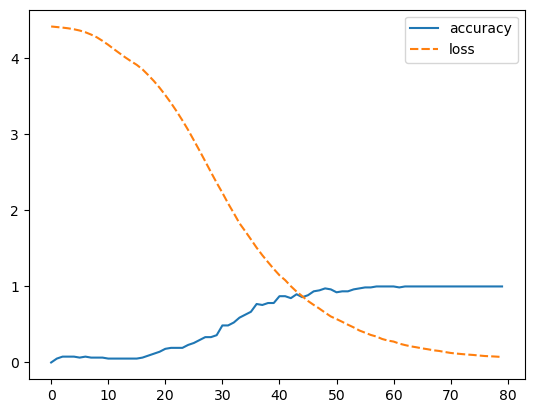

In [82]:
import seaborn as sns
sns.lineplot(model.history.history)

In [84]:
print("""Artificial intelligence (AI) is transforming various industries by enabling machines to perform tasks that typically require human intelligence. One key area within AI is deep learning, which uses neural networks to model complex patterns in large datasets. These models can be trained in different ways, including supervised and unsupervised learning. Deep learning has led to significant advancements in technologies such as autonomous vehicles, voice-activated virtual assistants, medical diagnostics, and predictive analytics. By processing vast amounts of data, deep learning algorithms are able to recognize images, translate languages, and even predict future trends, driving innovation across numerous fields.""")

Artificial intelligence (AI) is transforming various industries by enabling machines to perform tasks that typically require human intelligence. One key area within AI is deep learning, which uses neural networks to model complex patterns in large datasets. These models can be trained in different ways, including supervised and unsupervised learning. Deep learning has led to significant advancements in technologies such as autonomous vehicles, voice-activated virtual assistants, medical diagnostics, and predictive analytics. By processing vast amounts of data, deep learning algorithms are able to recognize images, translate languages, and even predict future trends, driving innovation across numerous fields.


In [86]:
test_sentenses = [
    "is transforming various by enabling machines"
]

In [88]:
for sent in test_sentenses:
    test_words = sent.split(" ")
    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])   
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
pred  ['is', 'transforming', 'various', 'by', 'enabling', 'machines'] 
= industries 


